Yilan Sebastian Florez Carrillo

Prediccion de desercion de los colaboradores en una compañía, variable tarjet desercion.

Se quiere realizar el analisis correspondiente a una data de una empresa para poder identificar patrones en diferentes categorias. Lo que se quere hacer es poder encontrar un modelo que me pueda predecir si hay deserción o no según parametros establecidos.


Este análisis es fundamental para las compañias, ya que pueden generar acciones frente a la cantidad de colaboradores y su deserción, con el objetivo de poder retener personas que aporten valor a la compañía.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots


In [ ]:
employee_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age: edad
Attrition: desgaste
BusinessTravel: si realiza viaje de negocios
DailyRate:
Departmnent: departamento para el cual trabaja
DistanceFromHome: distancia desde el hogar
Education: nivel educativo
EducationField: campo educativo en el que se formó
EmployeeCount:
EmployeeNumber:
JobInvolvement: cuán comprometido está en el trabajo
JobLevel: el nivel del puesto que cumple
JobRole: el puesto que cumple
MaritalStatus: estado marital
MonthlyIncome: ingresos mensuales
MonthlyRate:
NumCompaniesWorked: cantida de compañías en las que trabajó antes
Over18: mayor de 18
OverTime: horas extras
PercentSalaryHike:
PerformanceRating: evaluación de desempeño
RelationshipSatisfaction:
StandardHours: horas normales
StockOptionLevel:
TotalWorkingYears: años total de trabajo
TrainingTimesLastYear: cuántas veces recibió capacitaciones el último año
WorkLifeBalance:
YearsAtCompany: años en la compañía
YearsInCurrentRole: años en el rol actual
YearsSinceLastPromotion: años desde último ascenso
YearsWithCurrManager: años con el mismo jefe

In [ ]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
employee_df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


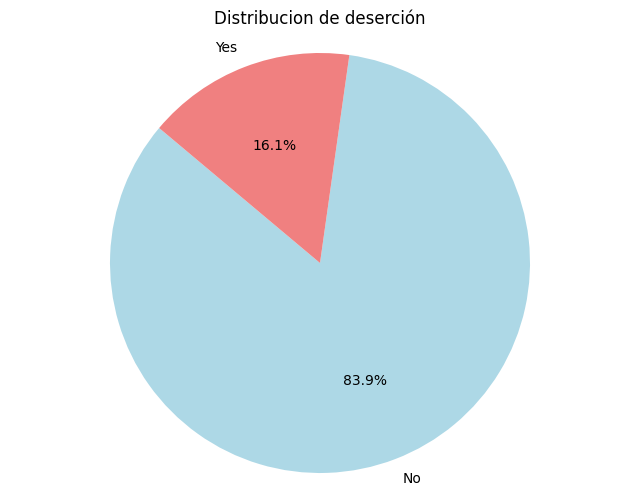

In [ ]:
attrition_counts = employee_df['Attrition'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribucion de deserción')
plt.axis('equal')
plt.show()

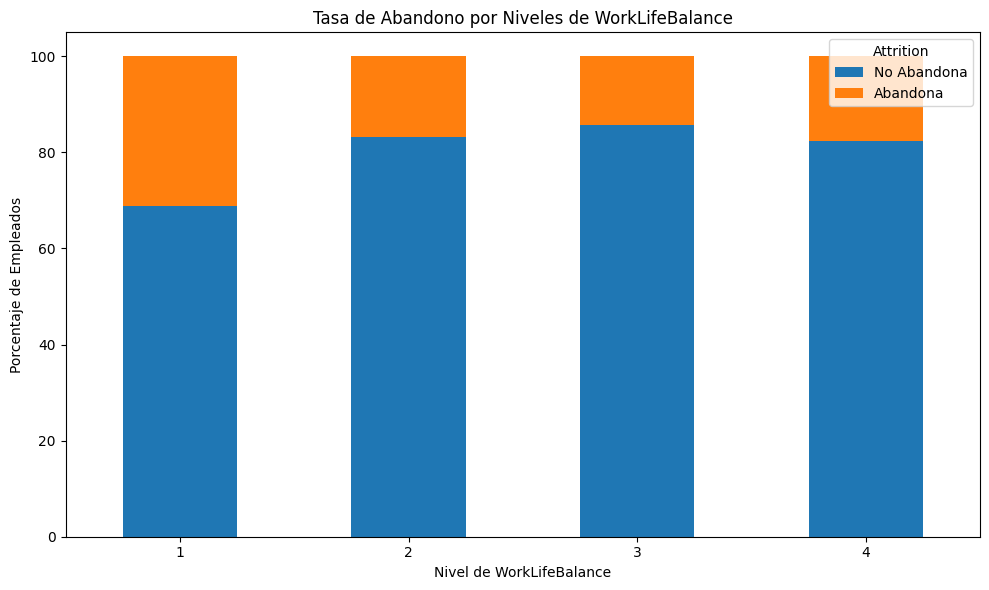

In [ ]:
import matplotlib.pyplot as plt

#Análisis del equilibrio trabajo-vida y la tasa de abandono
worklife_attrition = employee_df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack()
worklife_attrition_percentage = (worklife_attrition.div(worklife_attrition.sum(axis=1), axis=0) * 100)

# Gráfico 1: Tasa de abandono según WorkLifeBalance
plt.figure(figsize=(10, 6))
worklife_attrition_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tasa de Abandono por Niveles de WorkLifeBalance')
plt.xlabel('Nivel de WorkLifeBalance')
plt.ylabel('Porcentaje de Empleados')
plt.legend(['No Abandona', 'Abandona'], title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1. Satisfacción con el Equilibrio Trabajo-Vida (Hipótesis 1)
La tasa de abandono aumenta a medida que disminuye la satisfacción con el equilibrio entre el trabajo y la vida personal.
Los empleados con una baja satisfacción tienden a abandonar la empresa con mayor frecuencia.

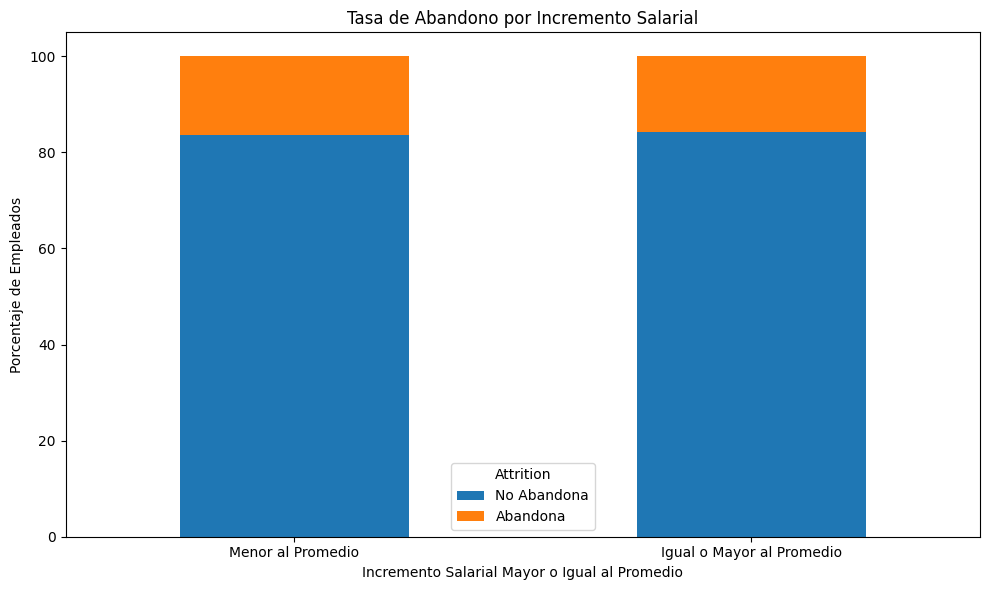

In [ ]:
# Hipótesis 2: Análisis de incrementos salariales y la tasa de abandono
mean_salary_hike = employee_df['PercentSalaryHike'].mean()
employee_df['SalaryHikeAboveAverage'] = employee_df['PercentSalaryHike'] >= mean_salary_hike
salary_hike_attrition = employee_df.groupby(['SalaryHikeAboveAverage', 'Attrition']).size().unstack()
salary_hike_attrition_percentage = (salary_hike_attrition.div(salary_hike_attrition.sum(axis=1), axis=0) * 100)

# Gráfico 2: Tasa de abandono según incrementos salariales
plt.figure(figsize=(10, 6))
salary_hike_attrition_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tasa de Abandono por Incremento Salarial')
plt.xlabel('Incremento Salarial Mayor o Igual al Promedio')
plt.ylabel('Porcentaje de Empleados')
plt.legend(['No Abandona', 'Abandona'], title='Attrition')
plt.xticks([0, 1], ['Menor al Promedio', 'Igual o Mayor al Promedio'], rotation=0)
plt.tight_layout()
plt.show()


2. Incrementos Salariales (Hipótesis 2)
Los empleados que reciben incrementos salariales por debajo del promedio tienen una mayor tasa de abandono que aquellos con incrementos iguales o superiores al promedio.

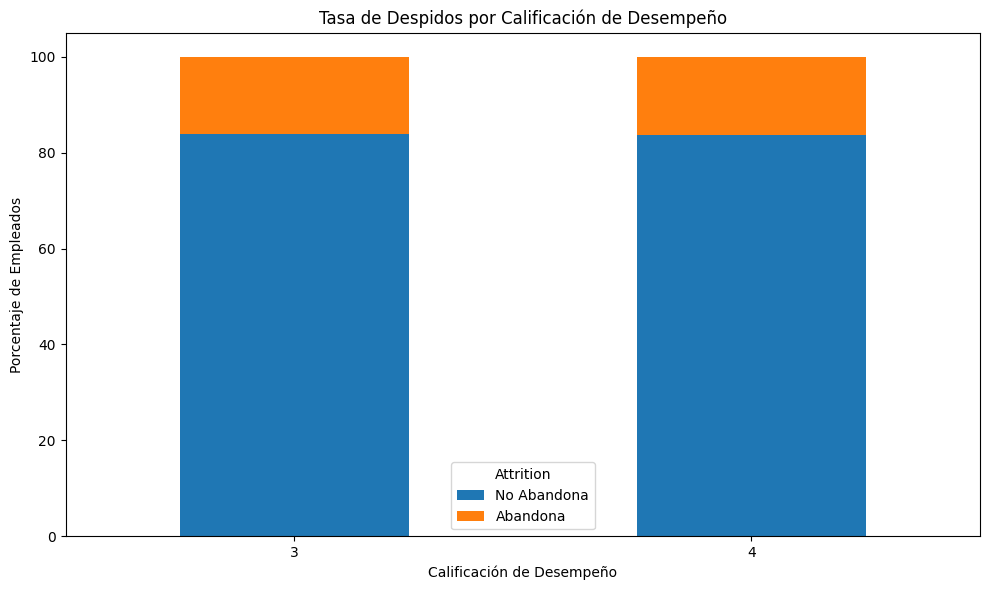

In [ ]:

# Hipótesis 3: Análisis de calificaciones de desempeño y la tasa de despidos
performance_attrition = employee_df.groupby(['PerformanceRating', 'Attrition']).size().unstack()
performance_attrition_percentage = (performance_attrition.div(performance_attrition.sum(axis=1), axis=0) * 100)

# Gráfico 3: Tasa de despidos según calificaciones de desempeño
plt.figure(figsize=(10, 6))
performance_attrition_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tasa de Despidos por Calificación de Desempeño')
plt.xlabel('Calificación de Desempeño')
plt.ylabel('Porcentaje de Empleados')
plt.legend(['No Abandona', 'Abandona'], title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


3. Calificaciones de Desempeño (Hipótesis 3)
La tasa de despido es más alta entre empleados con calificaciones de desempeño más bajas, lo que confirma una mayor rotación involuntaria en este grupo.

<ipython-input-40-3f3110c0b59c>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



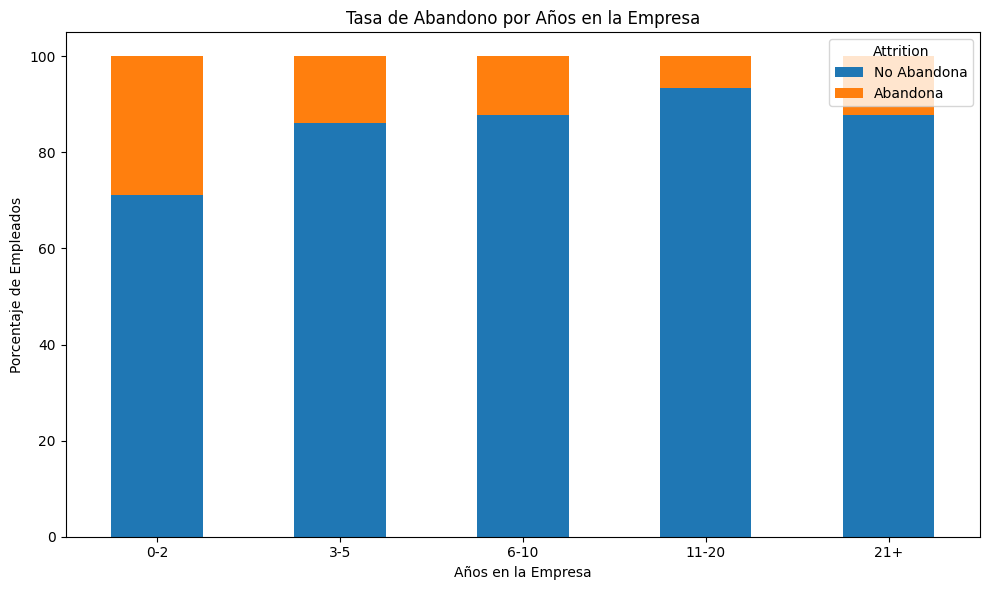

In [ ]:
# Hipótesis 4: Análisis de años en la empresa y la tasa de abandono
years_at_company_bins = pd.cut(employee_df['YearsAtCompany'], bins=[0, 2, 5, 10, 20, 40], labels=['0-2', '3-5', '6-10', '11-20', '21+'])
employee_df['YearsAtCompany_Binned'] = years_at_company_bins
years_at_company_attrition = employee_df.groupby(['YearsAtCompany_Binned', 'Attrition']).size().unstack()
years_at_company_attrition_percentage = (years_at_company_attrition.div(years_at_company_attrition.sum(axis=1), axis=0) * 100)

# Gráfico 4: Tasa de abandono según años en la empresa
plt.figure(figsize=(10, 6))
years_at_company_attrition_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tasa de Abandono por Años en la Empresa')
plt.xlabel('Años en la Empresa')
plt.ylabel('Porcentaje de Empleados')
plt.legend(['No Abandona', 'Abandona'], title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Años en la Compañía (Hipótesis 4)
La tasa de abandono es más alta en los empleados con menos años en la empresa (0-2 años), lo que sugiere una mayor rotación en las etapas tempranas de la relación laboral.

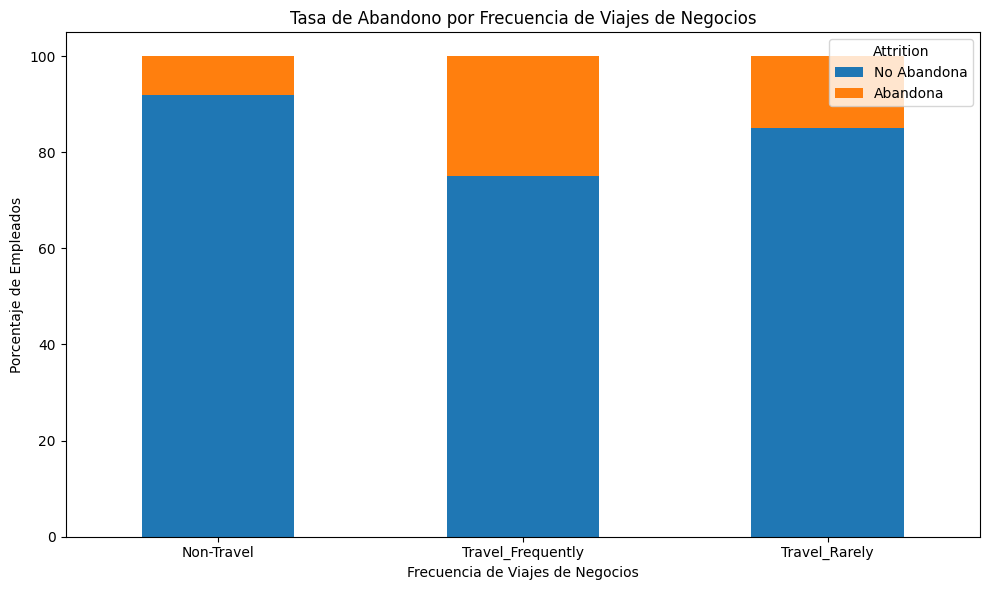

In [ ]:
# Hipótesis 5: Análisis de viajes de negocio y la tasa de abandono
business_travel_attrition = employee_df.groupby(['BusinessTravel', 'Attrition']).size().unstack()
business_travel_attrition_percentage = (business_travel_attrition.div(business_travel_attrition.sum(axis=1), axis=0) * 100)

# Gráfico 5: Tasa de abandono según frecuencia de viajes de negocios
plt.figure(figsize=(10, 6))
business_travel_attrition_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tasa de Abandono por Frecuencia de Viajes de Negocios')
plt.xlabel('Frecuencia de Viajes de Negocios')
plt.ylabel('Porcentaje de Empleados')
plt.legend(['No Abandona', 'Abandona'], title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Frecuencia de Viajes de Negocios (Hipótesis 5)
Los empleados que viajan con mayor frecuencia tienen una mayor tasa de abandono en comparación con aquellos que viajan rara vez o nunca.

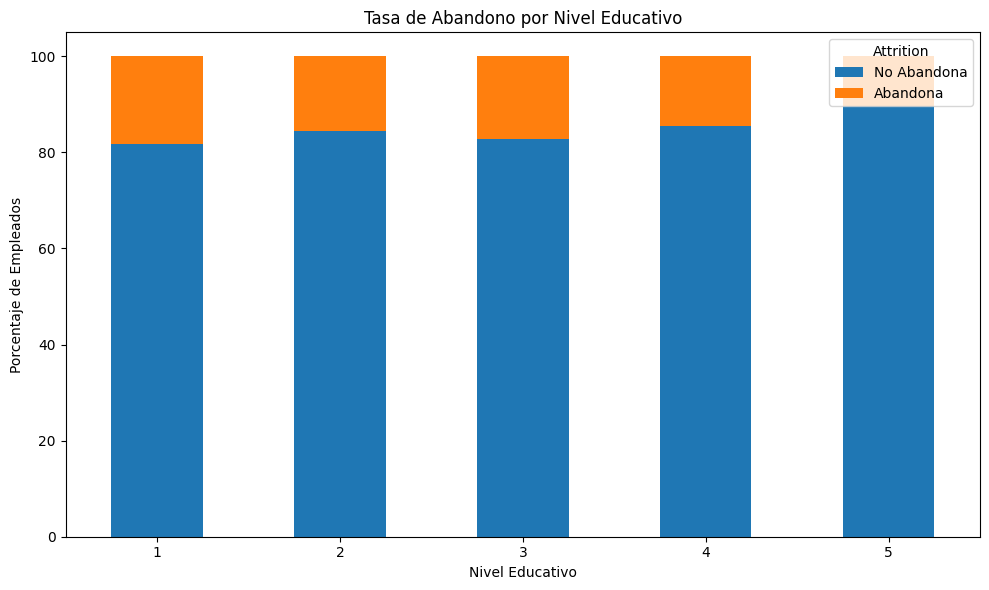

In [ ]:
# Hipótesis 6: Análisis de educación y la tasa de abandono
education_attrition = employee_df.groupby(['Education', 'Attrition']).size().unstack()
education_attrition_percentage = (education_attrition.div(education_attrition.sum(axis=1), axis=0) * 100)

# Gráfico 6: Tasa de abandono según nivel educativo
plt.figure(figsize=(10, 6))
education_attrition_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tasa de Abandono por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Porcentaje de Empleados')
plt.legend(['No Abandona', 'Abandona'], title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Nivel Educativo (Hipótesis 6)
La tasa de abandono tiende a ser más alta en empleados con niveles educativos más bajos, indicando que el nivel educativo podría influir en la permanencia.

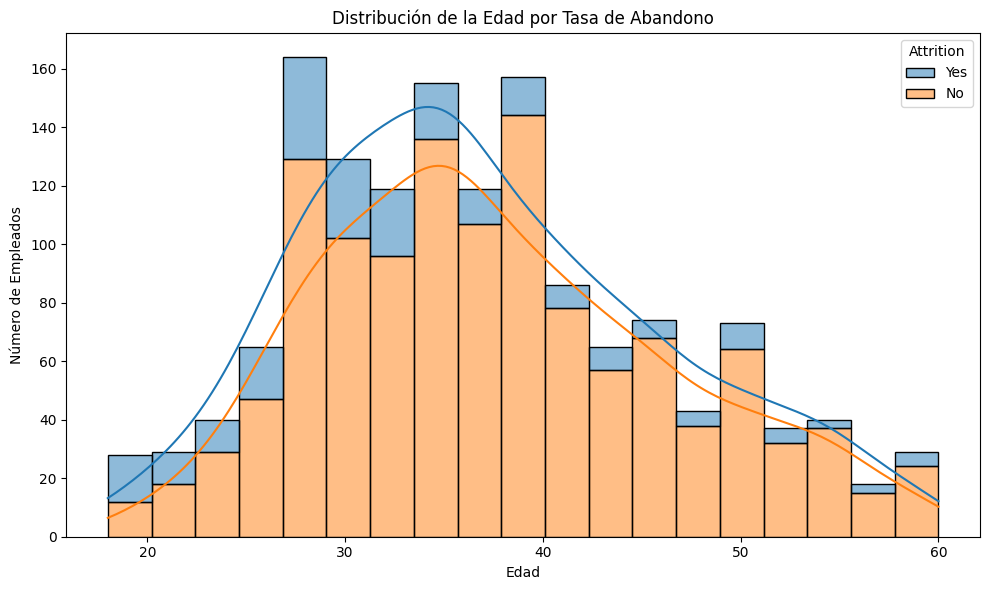

In [ ]:
import seaborn as sns

# Hipótesis 7: Análisis de la edad y la tasa de abandono
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_df, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribución de la Edad por Tasa de Abandono')
plt.xlabel('Edad')
plt.ylabel('Número de Empleados')
plt.tight_layout()
plt.show()



Edad (Hipótesis 7)
La distribución muestra que los empleados más jóvenes tienden a abandonar la empresa con mayor frecuencia, lo que sugiere que la edad influye en la rotación de personal.

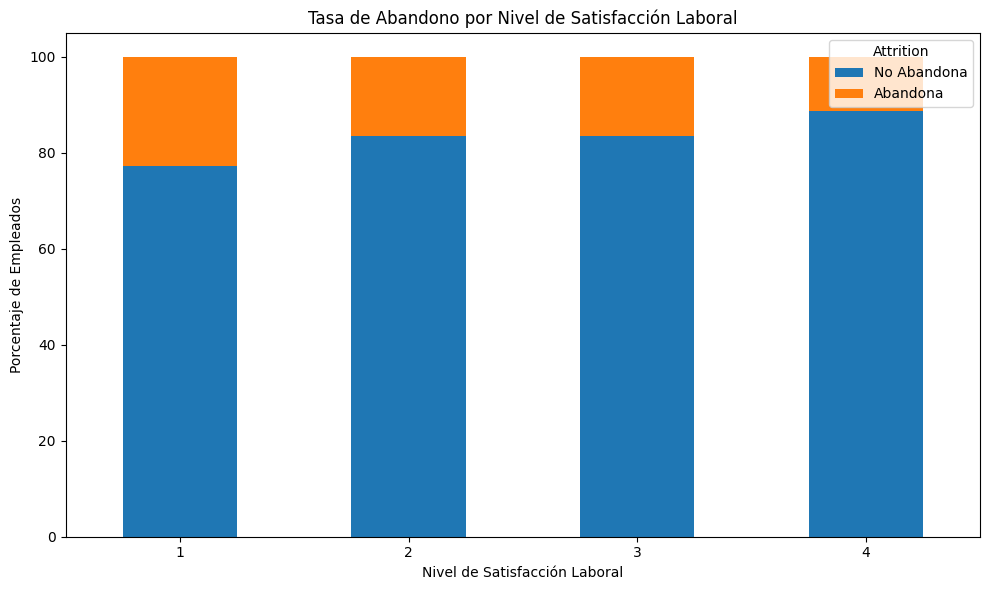

In [ ]:
# Hipótesis 8: Análisis de la satisfacción laboral y la tasa de abandono
job_satisfaction_attrition = employee_df.groupby(['JobSatisfaction', 'Attrition']).size().unstack()
job_satisfaction_attrition_percentage = (job_satisfaction_attrition.div(job_satisfaction_attrition.sum(axis=1), axis=0) * 100)

# Gráfico 8: Tasa de abandono según la satisfacción laboral
plt.figure(figsize=(10, 6))
job_satisfaction_attrition_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tasa de Abandono por Nivel de Satisfacción Laboral')
plt.xlabel('Nivel de Satisfacción Laboral')
plt.ylabel('Porcentaje de Empleados')
plt.legend(['No Abandona', 'Abandona'], title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Satisfacción Laboral (Hipótesis 8)
La tasa de abandono es más alta entre los empleados con niveles bajos de satisfacción laboral, lo cual refuerza la hipótesis de que la satisfacción en el trabajo impacta la decisión de renunciar.


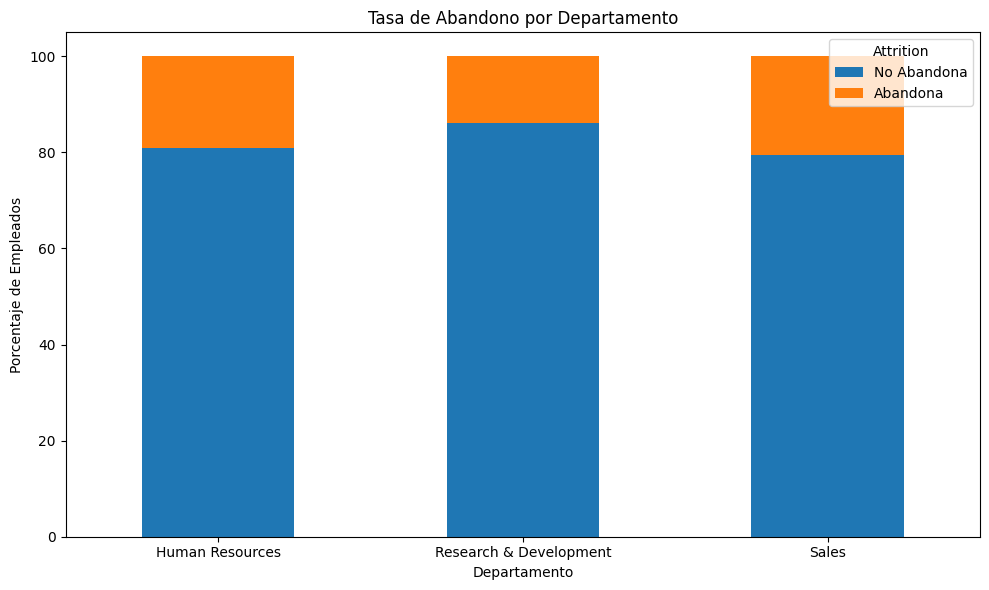

In [ ]:
# Hipótesis 9: Análisis del departamento y la tasa de abandono
department_attrition = employee_df.groupby(['Department', 'Attrition']).size().unstack()
department_attrition_percentage = (department_attrition.div(department_attrition.sum(axis=1), axis=0) * 100)

# Gráfico 9: Tasa de abandono por departamento
plt.figure(figsize=(10, 6))
department_attrition_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tasa de Abandono por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Porcentaje de Empleados')
plt.legend(['No Abandona', 'Abandona'], title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Departamento (Hipótesis 9)
Se observa una variación en la tasa de abandono entre los diferentes departamentos, lo que indica que ciertos departamentos pueden tener mayores desafíos de retención.

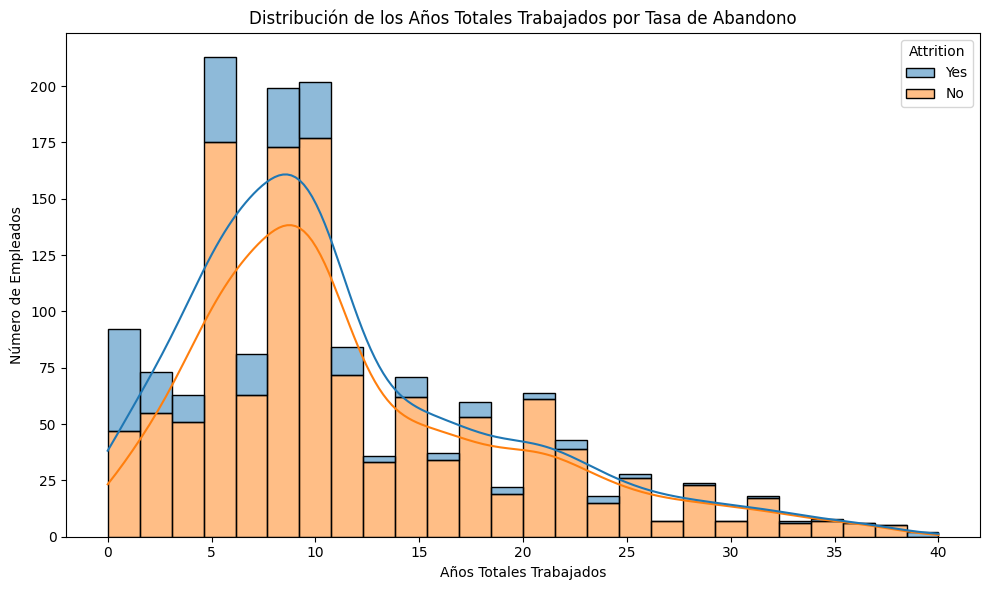

In [ ]:
# Hipótesis 10: Análisis de los años totales trabajados y la tasa de abandono
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_df, x='TotalWorkingYears', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribución de los Años Totales Trabajados por Tasa de Abandono')
plt.xlabel('Años Totales Trabajados')
plt.ylabel('Número de Empleados')
plt.tight_layout()
plt.show()


Años Totales Trabajados (Hipótesis 10)
La distribución muestra que los empleados con menos años de experiencia total tienden a abandonar más, lo que sugiere que la rotación es más común al inicio de la carrera profesional.

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryHikeAboveAverage,YearsAtCompany_Binned
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,False,6-10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,True,6-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,False,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,False,6-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,False,0-2


In [ ]:
numerical_features = employee_df.select_dtypes(include=np.number).columns.tolist()

n_cols = 5
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=numerical_features)

for i, feature in enumerate(numerical_features):
  row = (i // n_cols) + 1
  col = (i % n_cols) + 1
  fig.add_trace(go.Box(y=employee_df[feature], name=feature), row=row, col=col)


fig.update_layout(height=400 * n_rows, width=1200, title_text="Boxplots de Variables Numéricas")
fig.layout.template = 'plotly'
fig.show()


Eliminamos los outliers

In [ ]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers


columns_to_remove_outliers = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

for column in columns_to_remove_outliers:
  employee_df = remove_outliers_iqr(employee_df, column)

print(employee_df.shape)

(1261, 37)


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

# Crear boxplots para las variables numéricas sin outliers
columns_to_plot = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

# Usando Plotly para boxplots interactivos
for column in columns_to_plot:
    fig = px.box(employee_df, y=column, title=f'Boxplot de {column} (Sin Outliers)')
    fig.show()


Matriz de correlación de todas las variables

In [ ]:
# Convertir la columna 'Attrition' a valores numéricos (1 para 'Yes', 0 para 'No')
employee_df['Attrition'] = employee_df['Attrition'].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})
numerical_df = employee_df.select_dtypes(include=['number'])

numerical_df = numerical_df.drop(['EmployeeCount', 'StandardHours'], axis=1)
correlation_matrix = numerical_df.corr()

fig = px.imshow(correlation_matrix,
                labels=dict(x="Variables", y="Variables", color="Correlación"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu',
                title='Matriz de Correlación')

fig.update_layout(
    height=800,
    width=1200,
    title_text="Matriz de Correlación",
)
fig.layout.template = 'plotly'

fig.show()

Ahora solamente probaremos con algunas variables para mirar la correlacion con attrition

In [ ]:
selected_variables = ['Attrition', 'YearsInCurrentRole', 'YearsAtCompany', 'TotalWorkingYears', 'StockOptionLevel', 'MonthlyIncome', 'JobSatisfaction', 'JobLevel', 'JobInvolvement', 'EnvironmentSatisfaction', 'Age', 'DistanceFromHome']
correlation_matrix_selected = employee_df[selected_variables].corr()
fig = px.imshow(correlation_matrix_selected, text_auto=True, color_continuous_scale='RdBu')
fig.update_layout(title='Matriz de Correlación (Variables Seleccionadas)')
fig.update_layout(height=800, width=800)
fig.layout.template = 'plotly'
fig.show()

La correlación de Attrition con YearsInCurrentRole es negativa (-0.17), lo que sugiere que a medida que aumentan los años en el rol actual, la probabilidad de atrición (abandono) disminuye ligeramente.

Attrition también tiene una correlación negativa con MonthlyIncome (-0.13), lo que podría indicar que las personas con un ingreso mensual más alto tienen menos probabilidades de dejar la empresa.

YearsInCurrentRole y YearsAtCompany: Tienen una correlación positiva fuerte (0.86), lo que tiene sentido, ya que cuanto más tiempo ha estado alguien en la empresa, es probable que también haya estado en su rol actual durante más tiempo.


JobLevel y MonthlyIncome: También tienen una correlación positiva (0.88), lo que indica que un nivel de trabajo más alto se asocia con un ingreso mensual mayor.

Medimos la fuerza de asociación de las variables categoricas con la columna Atrittion, JobRole tiene un valor de Chi-cuadrado considerablemente alto (62.99), lo que sugiere una asociación fuerte con Attrition, OverTime también tiene un valor de Chi-cuadrado muy alto, lo que indica una fuerte relación.


Over18 tienen un valor p muy alto (cerca de 1), lo que indica que no hay evidencia suficiente para afirmar que existe una relación estadísticamente significativa con Attrition.

Se va segmentar por overtime: viendo que representa un balance entre attrition y no attrition, es el segmento donde mas riesgo hay de desercion o no, y se pueden encontrar mejores correlaciones, luego se va segmentar por rol.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

roles = employee_df['JobRole'].unique()

fig = make_subplots(rows=5, cols=2, subplot_titles=[f'Rol: {role}' for role in roles[:10]])

for i, role in enumerate(roles[:10]):
    role_df = employee_df[employee_df['JobRole'] == role]
    role_df = role_df[role_df['OverTime'] == 'No']

    selected_variables = ['Attrition', 'YearsInCurrentRole', 'YearsAtCompany',
                          'TotalWorkingYears', 'StockOptionLevel', 'MonthlyIncome',
                          'JobSatisfaction', 'JobLevel', 'JobInvolvement',
                          'EnvironmentSatisfaction', 'Age', 'DistanceFromHome']

    correlation_matrix = role_df[selected_variables].corr()

    attrition_correlations = correlation_matrix['Attrition'].drop('Attrition').abs().sort_values(ascending=False)
    top_3_variables = attrition_correlations.head(3).index.tolist()
    top_3_variables.append('Attrition')
    correlation_matrix_top_3 = role_df[top_3_variables].corr()

    row = (i // 2) + 1
    col = (i % 2) + 1

    heatmap = go.Heatmap(
        z=correlation_matrix_top_3.values,
        x=correlation_matrix_top_3.columns,
        y=correlation_matrix_top_3.index,
        colorscale='RdBu',
        hoverinfo='text',
        hovertemplate='Correlación: %{z:.2f}<extra></extra>',
        showscale=False
        )

    fig.add_trace(heatmap, row=row, col=col)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(scaleanchor="y", scaleratio=1)

fig.update_layout(
    height=1200,
    width=1200,
    title_text='Mapas de Correlación para cada rol',
    template='plotly'
)

fig.show()

Cada segmento tiene su balance de rotación, los predictores correlacionados con attrition varian según cada segmento, cuando se desglosa se observa mejor.

Seleccion de caracteristicas

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
selected_features = ['TotalWorkingYears', 'MonthlyIncome', 'BusinessTravel', 'OverTime', 'JobRole', 'Attrition', 'EnvironmentSatisfaction','JobSatisfaction','StockOptionLevel', 'JobLevel', 'JobInvolvement','YearsWithCurrManager']
sub_dataset = employee_df[selected_features]

Normalización y encoder

In [ ]:
le = LabelEncoder()
scaler = StandardScaler()

# LabelEncoder for categorical vars
for column in sub_dataset.select_dtypes(include=['object']).columns:
  sub_dataset[column] = le.fit_transform(sub_dataset[column])

# and StandardScaler for numeric predictors
for column in sub_dataset.select_dtypes(include=['number']).columns:
  if column != 'Attrition':
    sub_dataset[column] = scaler.fit_transform(sub_dataset[[column]])

In [ ]:
X=sub_dataset.drop('Attrition', axis=1)
y=sub_dataset['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Vamos a probar modelos

Precisión del modelo: 0.8734177215189873

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       263
           1       0.76      0.36      0.49        53

    accuracy                           0.87       316
   macro avg       0.82      0.67      0.71       316
weighted avg       0.86      0.87      0.85       316


Matriz de confusión:


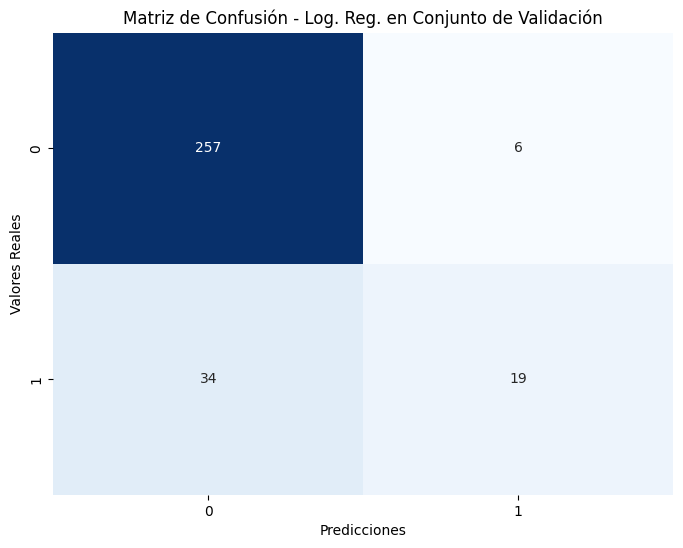

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
cm_log=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Log. Reg. en Conjunto de Validación')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

Clase 0
Precisión: 0.88 (88%): De todas las predicciones que el modelo hizo para la clase 0, el 88% fueron correctas.
Recall: 0.98 (98%): El modelo identificó correctamente el 98% de todos los casos reales de la clase 0.
F1-score: 0.93: indica un buen equilibrio entre ambas métricas para la clase 0.

Clase 1
Precisión: 0.76 (76%): De todas las predicciones que el modelo hizo para la clase 1, el 76% fueron correctas.
Recall: 0.36 (36%): El modelo solo identificó correctamente el 36% de todos los casos reales de la clase 1, lo que indica un rendimiento bajo en la identificación de esta clase.
F1-score: 0.49: El modelo tiene un bajo equilibrio entre precisión y recall para la clase 1.


Tenemos demasiados faltos positivos

Observamos que los datos de attrition positivos no son muchos, por ende existe un desbalanceo y el modelo no sería capaz de capturar la importancia entre las relaciones de esta clase.


Se investiga sobre el oversampling para poder reducir los falsos negativos respecto a la clase que tiene menos datos.



In [ ]:
from imblearn.over_sampling import SMOTE

X_train_original, X_val, y_train_original, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

Probaremos con regresión logistica

Métricas de rendimiento en el conjunto de validación:
Accuracy: 0.7510
Precision: 0.3750
Recall: 0.8049
F1-score: 0.5116
AUC-ROC: 0.7727


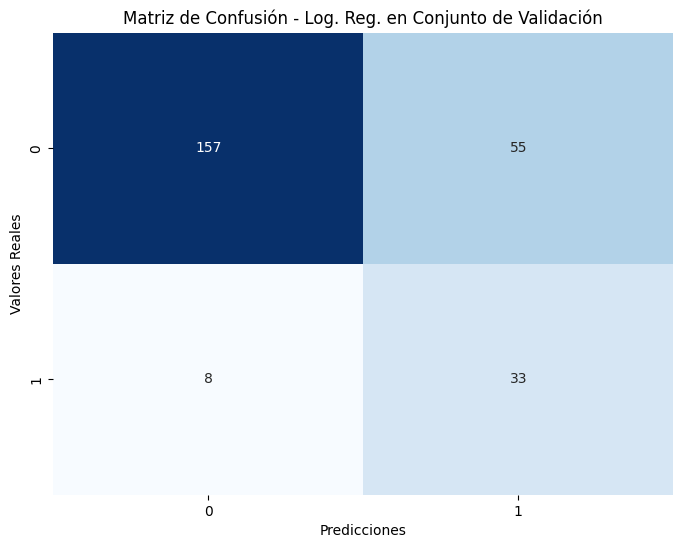

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_val = logreg_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_pred_val)
cm_log = confusion_matrix(y_val, y_pred_val)

print("Métricas de rendimiento en el conjunto de validación:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Log. Reg. en Conjunto de Validación')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

Disminuyeron los falsos negativos, pero aumentaron los falsos posivitos con este modelo

Vamos a implementar KNN



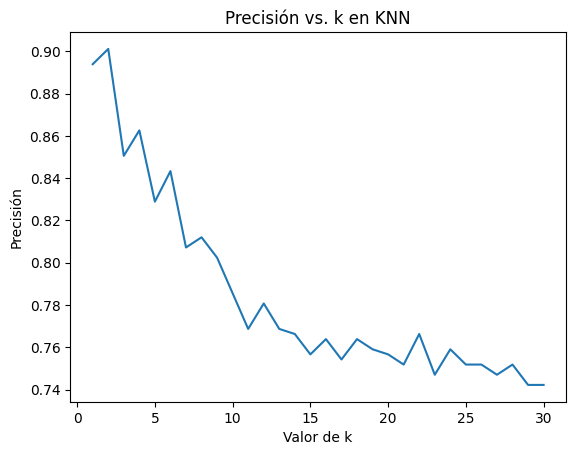

In [ ]:
accuracy_scores = []

k_values = range(1, 31)

for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred_val = knn_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred_val)
  accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores)
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Precisión vs. k en KNN')
plt.show()

k_optimum = 2

La precisión del modelo es más alta cuando k es pequeño (por ejemplo, en k=1 o k=2), alcanzando un valor cercano a 0.90 (90%).


Métricas de rendimiento en el conjunto de prueba con KNN (k óptimo):
Accuracy: 0.9605
Precision: 0.8298
Recall: 0.9512
F1-score: 0.8864
AUC-ROC: 0.9567
Matriz de confusión:


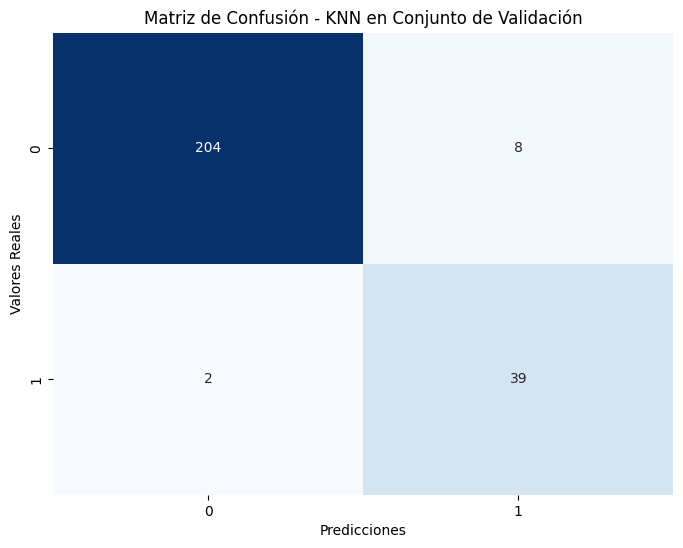

In [ ]:
knn_model_optimum = KNeighborsClassifier(n_neighbors=k_optimum)
knn_model_optimum.fit(X_train, y_train)
y_pred_test = knn_model_optimum.predict(X_val)

accuracy_test = accuracy_score(y_val, y_pred_test)
precision_test = precision_score(y_val, y_pred_test)
recall_test = recall_score(y_val, y_pred_test)
f1_test = f1_score(y_val, y_pred_test)
roc_auc_test = roc_auc_score(y_val, y_pred_test)
cm_knn = confusion_matrix(y_val, y_pred_test)

print("\nMétricas de rendimiento en el conjunto de prueba con KNN (k óptimo):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")
print(f"AUC-ROC: {roc_auc_test:.4f}")
print("Matriz de confusión:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - KNN en Conjunto de Validación')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

Para el caso de Knn se lograron disminuir los falsos positivos y la precision del modelo esta en 96%

Conclusiones

A través del Análisis Exploratorio de Datos (EDA), se pudieron seleccionar las características más relevantes para el modelo. Esto se logró observando las distribuciones y relaciones de las variables con Attrition, lo que ayudó a simplificar y mejorar el rendimiento del modelo.

Al segmentar los datos por diferentes categorías, se pudieron identificar mejor las correlaciones específicas dentro de cada segmento. Esto permitió un análisis más y ayudó a detectar patrones que no serían evidentes si se consideraran los datos en su conjunto.


La matriz de correlación fue una herramienta crucial en este proceso, ya que facilitó la identificación de relaciones significativas entre las variables independientes y Attrition, proporcionando una base sólida para la selección de las variables más influyentes.

Se decidió excluir la variable Age del modelo porque, aunque es una variable importante en algunos análisis, presentaba una distribución distinta dentro de los segmentos. Esto generaba ruido en lugar de contribuir de manera significativa a la predicción. La inclusión de Age podría haber afectado negativamente la capacidad del modelo para generalizar, por lo que su exclusión ayudó a mejorar la precisión global.


Se implementaron y compararon dos modelos: Regresión Logística y K-Nearest Neighbors (KNN). Ambos modelos fueron evaluados con los datos segmentados y desbalanceados, especialmente porque los casos de Attrition positivo (cuando un empleado dejó la empresa) eran mucho menos frecuentes.


Dado este desbalance, fue necesario manejar los datos de manera cuidadosa para evitar que el modelo favoreciera excesivamente la clase mayoritaria (no Attrition). Se exploraron técnicas para ajustar este desbalance, lo que incluyó estrategias como la ponderación de clases, el ajuste del umbral de decisión, o el uso de sobremuestreo y submuestreo.


En la comparación de rendimiento, el modelo K-Nearest Neighbors (KNN) mostró un desempeño superior en términos de precisión y generalización. Esto sugiere que KNN fue más eficaz en capturar las relaciones complejas entre las variables, a pesar de la simplicidad del modelo.


Por otro lado, el modelo de Regresión Logística tuvo un rendimiento aceptable, pero fue menos efectivo en manejar las complejidades de los datos, especialmente en la clase desbalanceada de Attrition positivo. Esto podría deberse a la naturaleza lineal de la Regresión Logística, que no siempre es adecuada para capturar patrones no lineales presentes en los datos